In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

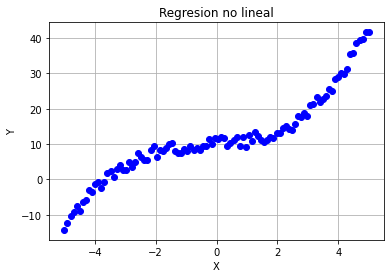

In [73]:
df = pd.read_csv('df_regresion_nolineal_1.cvs')
#print(df)

x = np.asanyarray(df[['x']])
y = np.asanyarray(df[['y']])

plt.figure()
plt.grid()
plt.plot(x,y,'bo')
plt.title('Regresion no lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [74]:
model = Sequential()

model.add(Dense(32,activation='relu',input_shape=[x.shape[1]]))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(loss='mean_squared_error',optimizer='adam')

In [75]:
hist = model.fit(xtrain,ytrain,batch_size=10,epochs=1500,verbose=0,validation_data=(xtest,ytest))

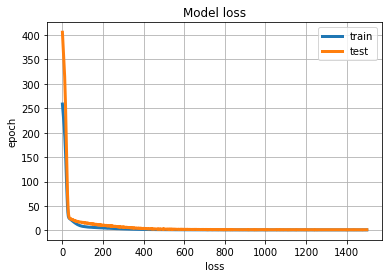

In [76]:
plt.figure()
plt.grid()
plt.plot(hist.history['loss'],lw=3)
plt.plot(hist.history['val_loss'],lw=3)
plt.title('Model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'])
plt.show()

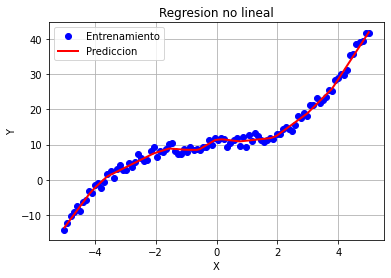

R2 Score =  0.9931262417110812


In [77]:
ypred = model.predict(x)

plt.figure()
plt.grid()
plt.plot(x,y,'bo')
plt.plot(x,ypred,'r',lw=2)
plt.title('Regresion no lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Entrenamiento','Prediccion'])
plt.show()

print('R2 Score = ', r2_score(y,ypred))